#  Project NBA Salary Predictor


## Data Importing and Pre-processing

In [60]:
# import libraries needed
import pandas as pd
import matplotlib.ticker as mticker
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm, skew, probplot
from scipy.special import boxcox1p
import warnings
from datetime import datetime
from sklearn.impute import SimpleImputer
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning, module="pandas.*")
%matplotlib inline

https://www.kaggle.com/datasets/jamiewelsh2/nba-player-salaries-2022-23-season קישור להורדת הdata base

In [61]:
# read file and see number of rows and cols
nba_df = pd.read_csv("./nba_2022-23_all_stats_with_salary.csv")
nba_df.shape

(467, 52)

In [62]:
nba_df.head()

,Unnamed: 0,Player Name,Salary,Position,Age,Team,GP,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Total Minutes,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,0,Stephen Curry,48070014,PG,34,GSW,56,56,34.7,10.0,20.2,0.493,4.9,11.4,0.427,5.1,8.8,0.579,0.614,4.6,5.0,0.915,0.7,5.4,6.1,6.3,0.9,0.4,3.2,2.1,29.4,1941,24.1,0.656,0.564,0.248,2.3,16.8,9.7,30.0,1.3,0.9,12.5,31.0,5.8,2.0,7.8,0.192,7.5,0.1,7.5,4.7
1,1,John Wall,47345760,PG,32,LAC,34,3,22.2,4.1,9.9,0.408,1.0,3.2,0.303,3.1,6.7,0.459,0.457,2.3,3.3,0.681,0.4,2.3,2.7,5.2,0.8,0.4,2.4,1.7,11.4,755,13.6,0.498,0.322,0.334,2.1,11.4,6.8,35.3,1.8,1.4,17.1,27.0,-0.4,0.7,0.3,0.020,-0.8,-0.4,-1.2,0.1
2,2,Russell Westbrook,47080179,PG,34,LAL/LAC,73,24,29.1,5.9,13.6,0.436,1.2,3.9,0.311,4.7,9.7,0.487,0.481,2.8,4.3,0.656,1.2,4.6,5.8,7.5,1.0,0.5,3.5,2.2,15.9,2126,16.1,0.513,0.289,0.317,4.7,16.5,10.8,38.6,1.7,1.3,18.4,27.7,-0.6,2.6,1.9,0.044,0.3,-0.1,0.2,1.2
3,3,LeBron James,44474988,PF,38,LAL,55,54,35.5,11.1,22.2,0.500,2.2,6.9,0.321,8.9,15.3,0.580,0.549,4.6,5.9,0.768,1.2,7.1,8.3,6.8,0.9,0.6,3.2,1.6,28.9,1954,23.9,0.583,0.309,0.268,3.7,20.8,12.5,33.5,1.2,1.4,11.6,33.3,3.2,2.4,5.6,0.138,5.5,0.6,6.1,4.0
4,4,Kevin Durant,44119845,PF,34,BRK/PHO,47,47,35.6,10.3,18.3,0.560,2.0,4.9,0.404,8.3,13.4,0.617,0.614,6.5,7.1,0.919,0.4,6.3,6.7,5.0,0.7,1.4,3.3,2.1,29.1,1672,25.9,0.677,0.267,0.387,1.2,19.5,10.5,24.5,1.0,3.4,13.4,30.7,4.7,2.1,6.8,0.194,6.0,1.2,7.1,3.9


Handling and arranging the information in the database

In [63]:
# reanme 'Unnamed: 0' column to 'ID'
nba_df = nba_df.rename(columns={"Unnamed: 0": "Id"}) # imputation
nba_df

,Id,Player Name,Salary,Position,Age,Team,GP,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Total Minutes,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,0,Stephen Curry,48070014,PG,34,GSW,56,56,34.7,10.0,20.2,0.493,4.9,11.4,0.427,5.1,8.8,0.579,0.614,4.6,5.0,0.915,0.7,5.4,6.1,6.3,0.9,0.4,3.2,2.1,29.4,1941,24.1,0.656,0.564,0.248,2.3,16.8,9.7,30.0,1.3,0.9,12.5,31.0,5.8,2.0,7.8,0.192,7.5,0.1,7.5,4.7
1,1,John Wall,47345760,PG,32,LAC,34,3,22.2,4.1,9.9,0.408,1.0,3.2,0.303,3.1,6.7,0.459,0.457,2.3,3.3,0.681,0.4,2.3,2.7,5.2,0.8,0.4,2.4,1.7,11.4,755,13.6,0.498,0.322,0.334,2.1,11.4,6.8,35.3,1.8,1.4,17.1,27.0,-0.4,0.7,0.3,0.020,-0.8,-0.4,-1.2,0.1
2,2,Russell Westbrook,47080179,PG,34,LAL/LAC,73,24,29.1,5.9,13.6,0.436,1.2,3.9,0.311,4.7,9.7,0.487,0.481,2.8,4.3,0.656,1.2,4.6,5.8,7.5,1.0,0.5,3.5,2.2,15.9,2126,16.1,0.513,0.289,0.317,4.7,16.5,10.8,38.6,1.7,1.3,18.4,27.7,-0.6,2.6,1.9,0.044,0.3,-0.1,0.2,1.2
3,3,LeBron James,44474988,PF,38,LAL,55,54,35.5,11.1,22.2,0.500,2.2,6.9,0.321,8.9,15.3,0.580,0.549,4.6,5.9,0.768,1.2,7.1,8.3,6.8,0.9,0.6,3.2,1.6,28.9,1954,23.9,0.583,0.309,0.268,3.7,20.8,12.5,33.5,1.2,1.4,11.6,33.3,3.2,2.4,5.6,0.138,5.5,0.6,6.1,4.0
4,4,Kevin Durant,44119845,PF,34,BRK/PHO,47,47,35.6,10.3,18.3,0.560,2.0,4.9,0.404,8.3,13.4,0.617,0.614,6.5,7.1,0.919,0.4,6.3,6.7,5.0,0.7,1.4,3.3,2.1,29.1,1672,25.9,0.677,0.267,0.387,1.2,19.5,10.5,24.5,1.0,3.4,13.4,30.7,4.7,2.1,6.8,0.194,6.0,1.2,7.1,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,462,Justin Minaya,35096,SF,23,POR,4,0,22.3,1.8,5.8,0.304,0.8,3.0,0.250,1.0,2.8,0.364,0.370,0.0,0.3,0.000,0.8,3.0,3.8,1.0,0.5,1.3,1.0,2.3,4.3,89,4.0,0.363,0.522,0.043,3.8,15.6,9.7,5.9,1.1,5.0,14.6,13.4,-0.2,0.1,-0.1,-0.067,-7.2,-1.9,-9.0,-0.2
463,463,Kobi Simmons,32795,SG,25,CHO,5,0,5.6,0.2,1.2,0.167,0.2,1.0,0.200,0.0,0.2,0.000,0.250,0.4,0.4,1.000,0.2,0.6,0.8,1.0,0.0,0.4,0.2,0.0,1.0,28,9.0,0.363,0.833,0.333,3.7,11.7,7.6,21.8,0.0,6.2,12.7,11.8,0.0,0.0,0.0,0.019,-1.0,0.1,-0.9,0.0
464,464,Gabe York,32171,SG,29,IND,3,0,18.7,2.7,7.0,0.381,2.0,6.0,0.333,0.7,1.0,0.667,0.524,0.7,0.7,1.000,0.0,2.0,2.0,1.7,0.7,0.0,0.0,1.7,8.0,56,11.8,0.548,0.857,0.095,0.0,11.9,5.9,12.3,1.7,0.0,0.0,16.4,0.1,0.0,0.1,0.091,-1.7,-1.8,-3.5,0.0
465,465,RaiQuan Gray,5849,PF,23,BRK,1,0,35.0,6.0,12.0,0.500,2.0,5.0,0.400,4.0,7.0,0.571,0.583,2.0,2.0,1.000,3.0,6.0,9.0,7.0,0.0,1.0,4.0,5.0,16.0,35,15.5,0.621,0.417,0.167,9.9,18.8,14.4,29.0,0.0,2.4,23.7,21.4,0.0,0.0,0.1,0.106,-0.6,-1.4,-2.0,0.0


In [64]:
# Remove spaces from column names
nba_df.columns = [col.replace(" ", "") for col in nba_df.columns]
nba_df.columns

Index(['Id', 'PlayerName', 'Salary', 'Position', 'Age', 'Team', 'GP', 'GS',
       'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'TotalMinutes', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS',
       'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP'],
      dtype='object')

In [65]:
# count number of categorical variables
category_count = 0

for cat in nba_df.dtypes:
    if cat == "object":
        category_count += 1

category_count

3

In [66]:
print("Number of categorical variables:", category_count)

# column 1 is the ID column so we subract 1
numeric_count = nba_df.shape[1] - category_count - 1

print("Number of contineous variables:", numeric_count)

Number of categorical variables: 3
Number of contineous variables: 48


In [67]:
# see all the column names
nba_df.columns

Index(['Id', 'PlayerName', 'Salary', 'Position', 'Age', 'Team', 'GP', 'GS',
       'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'TotalMinutes', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS',
       'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP'],
      dtype='object')

The code you provided generates descriptive statistics for the "Salary" column from the NBA dataset,is useful for understanding the salary structure within the league, uncovering trends, and performing further statistical analyses. It helps stakeholders like team managers, analysts, or researchers understand the financial situation of players and compare different players or teams.

In [68]:
# describe our target variable, 'Salary'

salary_description = nba_df['Salary'].describe()
print("Descriptive Statistics for 'Salary':")
print(f"Count: {salary_description['count']}")#number of pleyers
print(f"Mean: {salary_description['mean']:.2f}")#Average salary
print(f"Standard Deviation: {salary_description['std']:.2f}")#shows you how much the salaries are spread around the average.
print(f"Minimum: {salary_description['min']:.2f}")#Extreme data of the salary
print(f"25th Percentile: {salary_description['25%']:.2f}")
print(f"Median (50th Percentile): {salary_description['50%']:.2f}")
print(f"75th Percentile: {salary_description['75%']:.2f}")
print(f"Maximum: {salary_description['max']:.2f}")

Descriptive Statistics for 'Salary':
Count: 467.0
Mean: 8416598.75
Standard Deviation: 10708118.05
Minimum: 5849.00
25th Percentile: 1782621.00
Median (50th Percentile): 3722040.00
75th Percentile: 10633543.50
Maximum: 48070014.00


useful statistical measure because it provides a standardized way to compare the degree of variation between datasets with different units or scales. In this context, the CV helps assess the relative variability of player salaries in the NBA

In [69]:
# Calculate the coefficient of variation (CV)
cv = (salary_description['std'] / salary_description['mean']) * 100
print(f"Coefficient of Variation (CV): {cv:.2f}%")

Coefficient of Variation (CV): 127.23%


### Handling our missing data

In [70]:
# display the missing data and its percent of the column
total_missing = nba_df.isnull().sum().sort_values(ascending=False)
percent_missing = (nba_df.isnull().sum() / nba_df.isnull().count()).sort_values(ascending=False)

missing_data_df = pd.concat([total_missing, percent_missing], axis=1, keys=["Total Missing", "Percent Missing"])
missing_data_df.head(8)

,Total Missing,Percent Missing
FT%,23,0.049251
3P%,13,0.027837
2P%,4,0.008565
eFG%,1,0.002141
3PAr,1,0.002141
FTr,1,0.002141
TS%,1,0.002141
FG%,1,0.002141


In [71]:
# example row of a player who has missing data
# players with missing data are those who did not play many games so they never accumilated that stat during the season
null_fg = nba_df[nba_df['FG%'].isnull()]
null_fg

,Id,PlayerName,Salary,Position,Age,Team,GP,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,TotalMinutes,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
436,436,Alondes Williams,254446,SG,23,BRK,1,0,5.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,5,-20.9,NaN,NaN,NaN,0.0,22.0,11.2,0.0,0.0,0.0,100.0,17.7,-0.1,0.0,-0.1,-0.517,-21.3,-5.2,-26.5,0.0


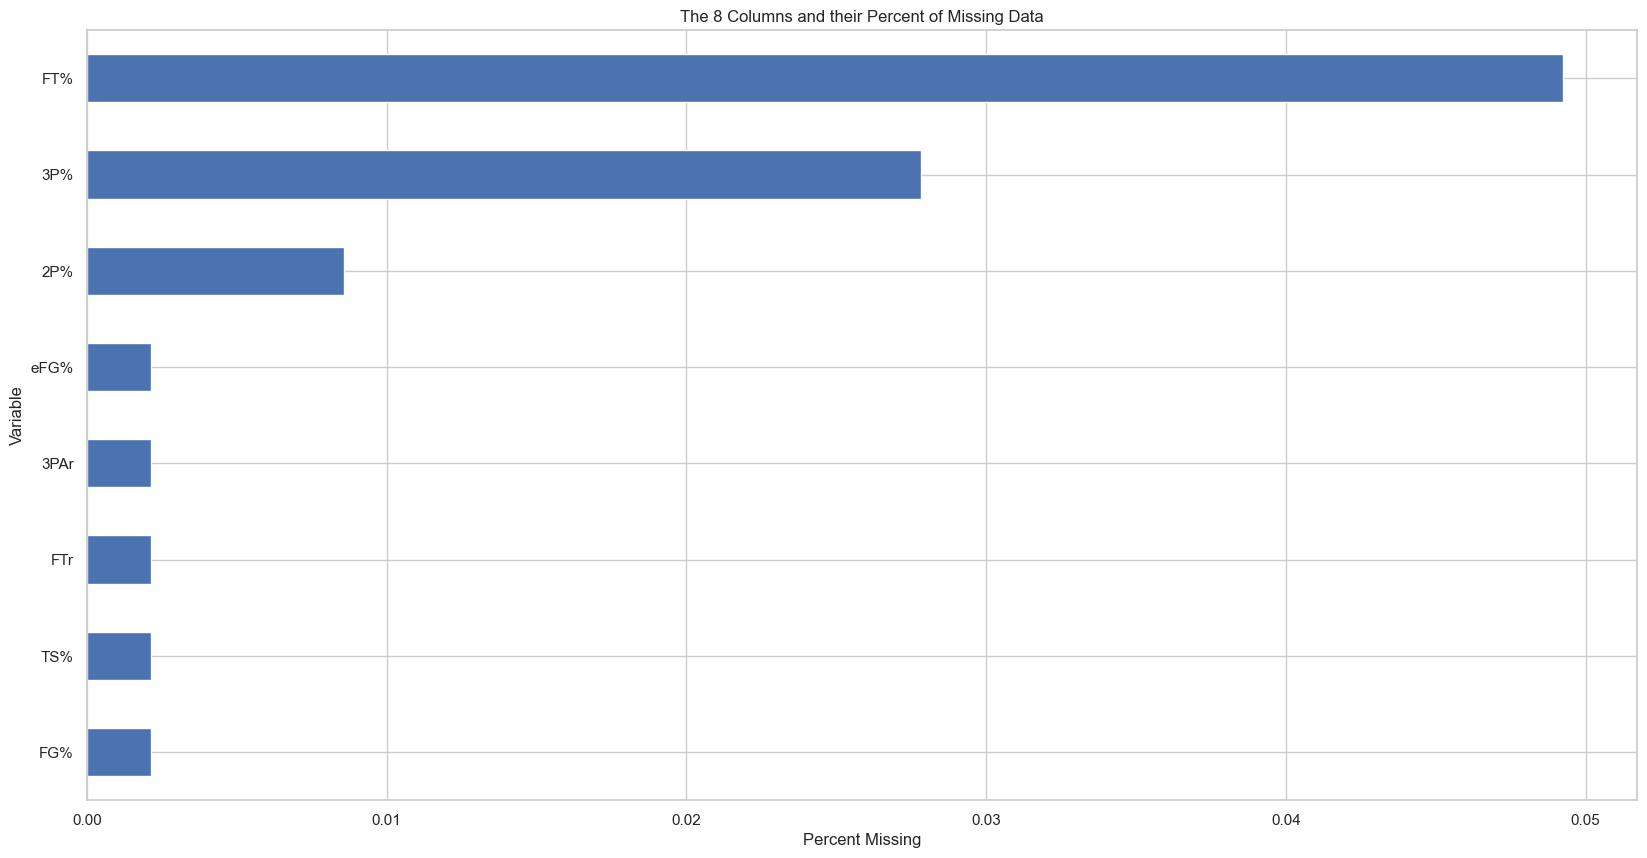

In [72]:
# visualize this in a bar graph
missing_data_df["Percent Missing"].head(8).plot(
    kind="barh", figsize=(20,10)
).invert_yaxis()
plt.xlabel("Percent Missing")
plt.ylabel("Variable")
plt.title("The 8 Columns and their Percent of Missing Data")
plt.show()

Handle the missing information in the file using imputation

In [73]:

# Separation between numerical columns and categorical columns
numeric_cols = nba_df.select_dtypes(include=[np.number]).columns
categorical_cols = nba_df.select_dtypes(exclude=[np.number]).columns

# Impute to numeric columns with average
numeric_imputer = SimpleImputer(strategy='mean')
nba_df[numeric_cols] = numeric_imputer.fit_transform(nba_df[numeric_cols])

# Imputation to categorical columns with mode
categorical_imputer = SimpleImputer(strategy='most_frequent')
nba_df[categorical_cols] = categorical_imputer.fit_transform(nba_df[categorical_cols])

print(nba_df)

        Id         PlayerName      Salary Position   Age     Team    GP    GS  \
0      0.0      Stephen Curry  48070014.0       PG  34.0      GSW  56.0  56.0   
1      1.0          John Wall  47345760.0       PG  32.0      LAC  34.0   3.0   
2      2.0  Russell Westbrook  47080179.0       PG  34.0  LAL/LAC  73.0  24.0   
3      3.0       LeBron James  44474988.0       PF  38.0      LAL  55.0  54.0   
4      4.0       Kevin Durant  44119845.0       PF  34.0  BRK/PHO  47.0  47.0   
..     ...                ...         ...      ...   ...      ...   ...   ...   
462  462.0      Justin Minaya     35096.0       SF  23.0      POR   4.0   0.0   
463  463.0       Kobi Simmons     32795.0       SG  25.0      CHO   5.0   0.0   
464  464.0          Gabe York     32171.0       SG  29.0      IND   3.0   0.0   
465  465.0       RaiQuan Gray      5849.0       PF  23.0      BRK   1.0   0.0   
466  466.0      Jacob Gilyard      5849.0       PG  24.0      MEM   1.0   0.0   

       MP    FG   FGA    FG

In [74]:
# show same player who had null values now has zeros in those fields
imputed_row = nba_df[nba_df["PlayerName"] == "Alondes Williams"]
imputed_row


,Id,PlayerName,Salary,Position,Age,Team,GP,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,TotalMinutes,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
436,436.0,Alondes Williams,254446.0,SG,23.0,BRK,1.0,0.0,5.0,0.0,0.0,0.465009,0.0,0.0,0.32509,0.0,0.0,0.533464,0.534266,0.0,0.0,0.753489,0.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,5.0,-20.9,0.563024,0.403655,0.249749,0.0,22.0,11.2,0.0,0.0,0.0,100.0,17.7,-0.1,0.0,-0.1,-0.517,-21.3,-5.2,-26.5,0.0


### Handling outliers for better training

This graph is a scatter plot that shows the relationship between the number of games played by the players (GP) on the x-axis and their salaries (Salary) on the y-axis

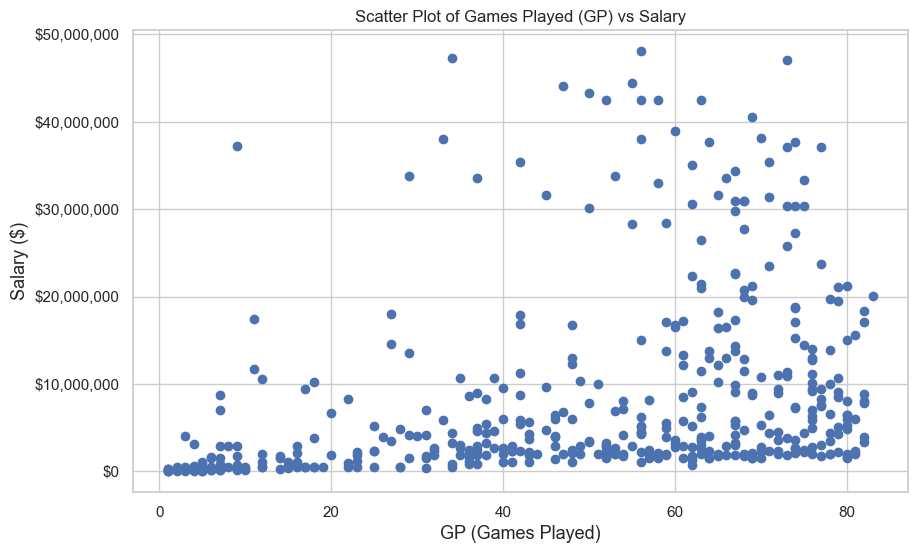

In [75]:
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter diagram of the number of games played by the players (GP) versus the salary (Salary)
ax.scatter(x=nba_df["GP"], y=nba_df["Salary"])

plt.xlabel("GP (Games Played)", fontsize=13)
plt.ylabel("Salary ($)", fontsize=13)

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.title("Scatter Plot of Games Played (GP) vs Salary")
plt.show()


There seem to be some outliers where players did not play the majority of the season, yet were given large salaries. This is likely due to season ending injuries. Additionally, there are players present in the data set that were on 10-day contracts. For this reason, we will remove data from players who played in less than 20 games.

In [76]:
# The number of players before the change
nba_df.shape[0]

467

In [77]:
# drop less than 20 games
nba_df = nba_df[nba_df['GP'] >= 20]

In [78]:
# The number of players after the change
nba_df.shape[0]

376

### Normalize

 performs a statistical analysis of the distribution of the Salary column in the player data and displays the results using a distribution plot and a QQ-plot

Understanding the distribution of salaries: The first chart gives us an idea of ​​the distribution of salaries and how it compares to a normal distribution.
Adjustment to a normal distribution: the indices mu and sigma give us information about the average and standard deviation of the salaries. If the data fits a normal distribution, it can indicate a certain behavior in the salary market.
Visual inspection of the fit to normality: The QQ-plot allows you to see visually whether the data does fit a normal distribution. If the points approach the straight line, this indicates that the data fit a normal distribution.
Explanation of the QQ-plot diagram
A QQ-plot compares the distribution of the actual data to a theoretical normal distribution. If the data is indeed normal, the points on the chart will be on or close to the straight line. Large deviations from the straight line imply that the data are not normal.


 mu = 9990402.62 and sigma = 11134520.23



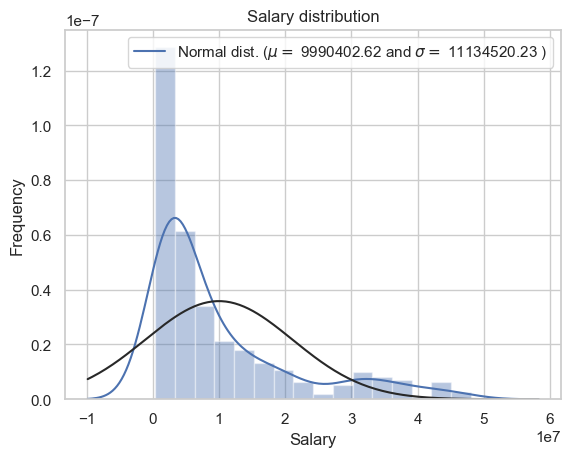

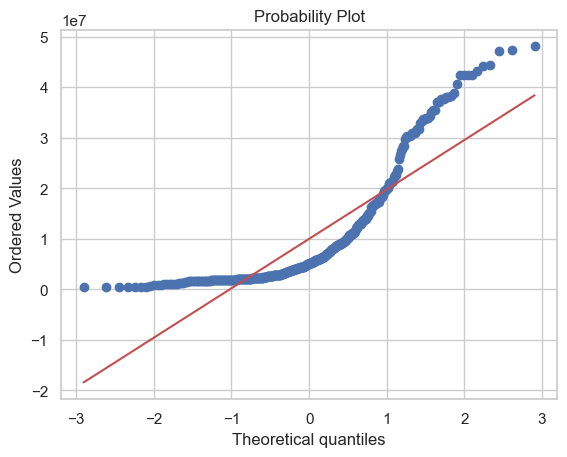

In [79]:

sns.distplot(nba_df["Salary"], fit=norm)


# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(nba_df["Salary"])
print("\n mu = {:.2f} and sigma = {:.2f}\n".format(mu, sigma))

# Now plot the distribution
plt.legend(
    ["Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )".format(mu, sigma)], loc="best"
)
plt.ylabel("Frequency")
plt.title("Salary distribution")

# Get also the QQ-plot
fig = plt.figure()
res = probplot(nba_df["Salary"], plot=plt)
plt.show()

Performs normalization on the salary column in the player data using the natural logarithm function (log1p) and displays the normalized salary distribution and its adaptation to a normal distribution using a distribution plot and QQ-plot

Normalization of the data: This operation is done to reduce the effect of extreme values ​​and transform the data into a distribution that is closer to a normal distribution.
Understanding the new distribution: The first chart gives us an idea of ​​the new distribution of salaries after normalization and how it compares to a normal distribution.
Visual inspection of the fit to normality: The QQ-plot allows you to see visually whether the corrected data does fit a normal distribution. If the points approach the straight line, this indicates that the corrected data fit a normal distribution


 mu = 15.54 and sigma = 1.09



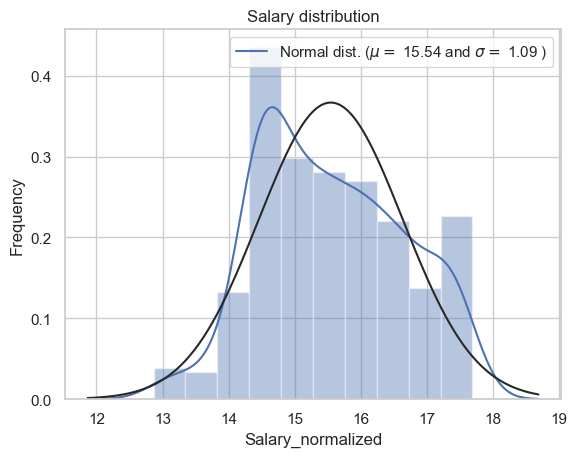

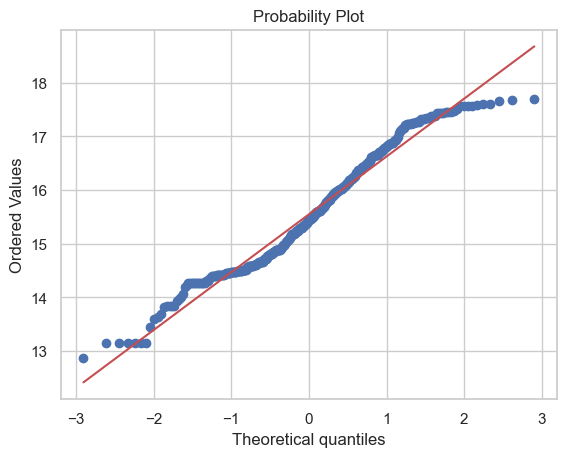

In [80]:

# We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
nba_df["Salary_normalized"] = np.log1p(nba_df["Salary"])

# Check the new distribution
sns.distplot(nba_df["Salary_normalized"], fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(nba_df["Salary_normalized"])
print("\n mu = {:.2f} and sigma = {:.2f}\n".format(mu, sigma))

# Now plot the distribution
plt.legend(
    ["Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )".format(mu, sigma)], loc="best"
)
plt.ylabel("Frequency")
plt.title("Salary distribution")

# Get also the QQ-plot
fig = plt.figure()
res = probplot(nba_df["Salary_normalized"], plot=plt)
plt.show()

## Data Analysis and Visualization

Creates a pairplot using the Seaborn library, which shows the relationships between several different variables in the player data

The pairplot diagram makes it possible to visually understand the relationships between the different variables in the data
. This is a particularly useful tool when you want to identify trends, patterns, or linear relationships between variables

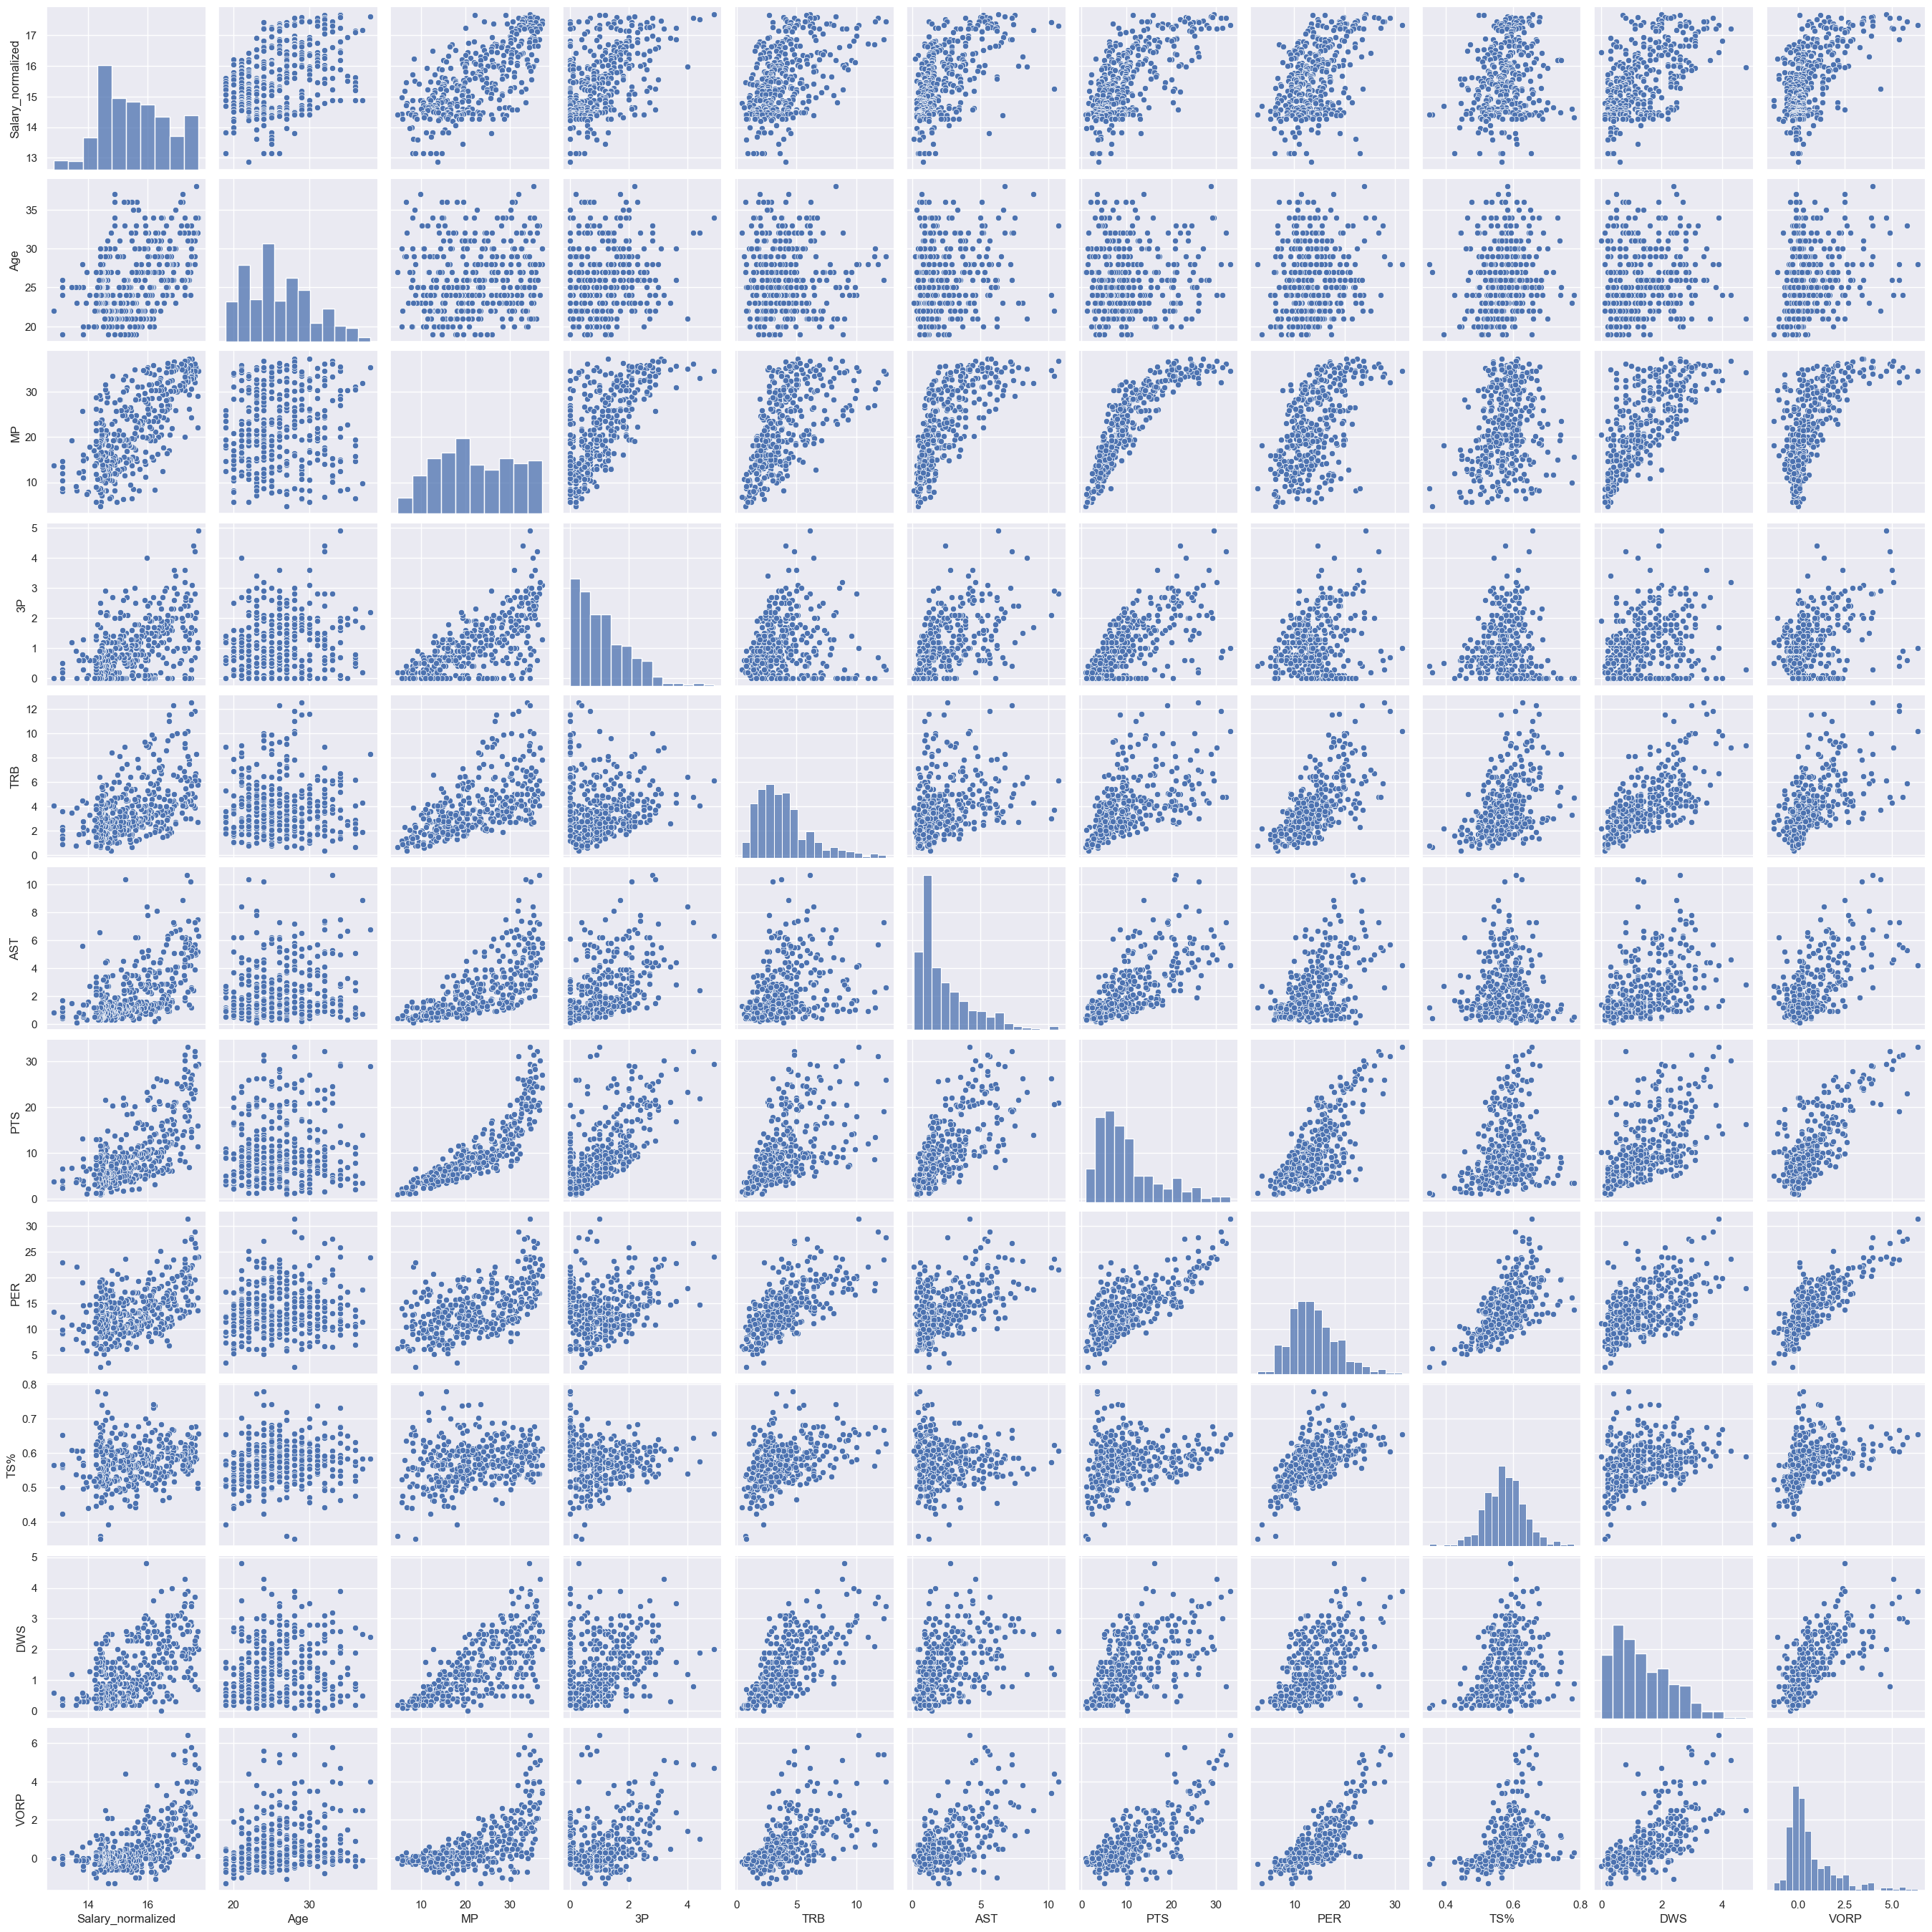

In [81]:
# scatterplot
sns.set()
cols = [
    "Salary_normalized",
    "Age",
    "MP",
    "3P",
    "TRB",
    "AST",
    "PTS",
    "PER",
    "TS%",
    "DWS",
    "VORP"
]
sns.pairplot(nba_df[cols], size=2.5)
plt.show();

The graph visually shows the correlation values ​​between the variables. The colors in the chart show the strength of the correlation, with the colors near the end of the scale indicating a strong correlation, and the middle colors indicating a weak or no correlation.

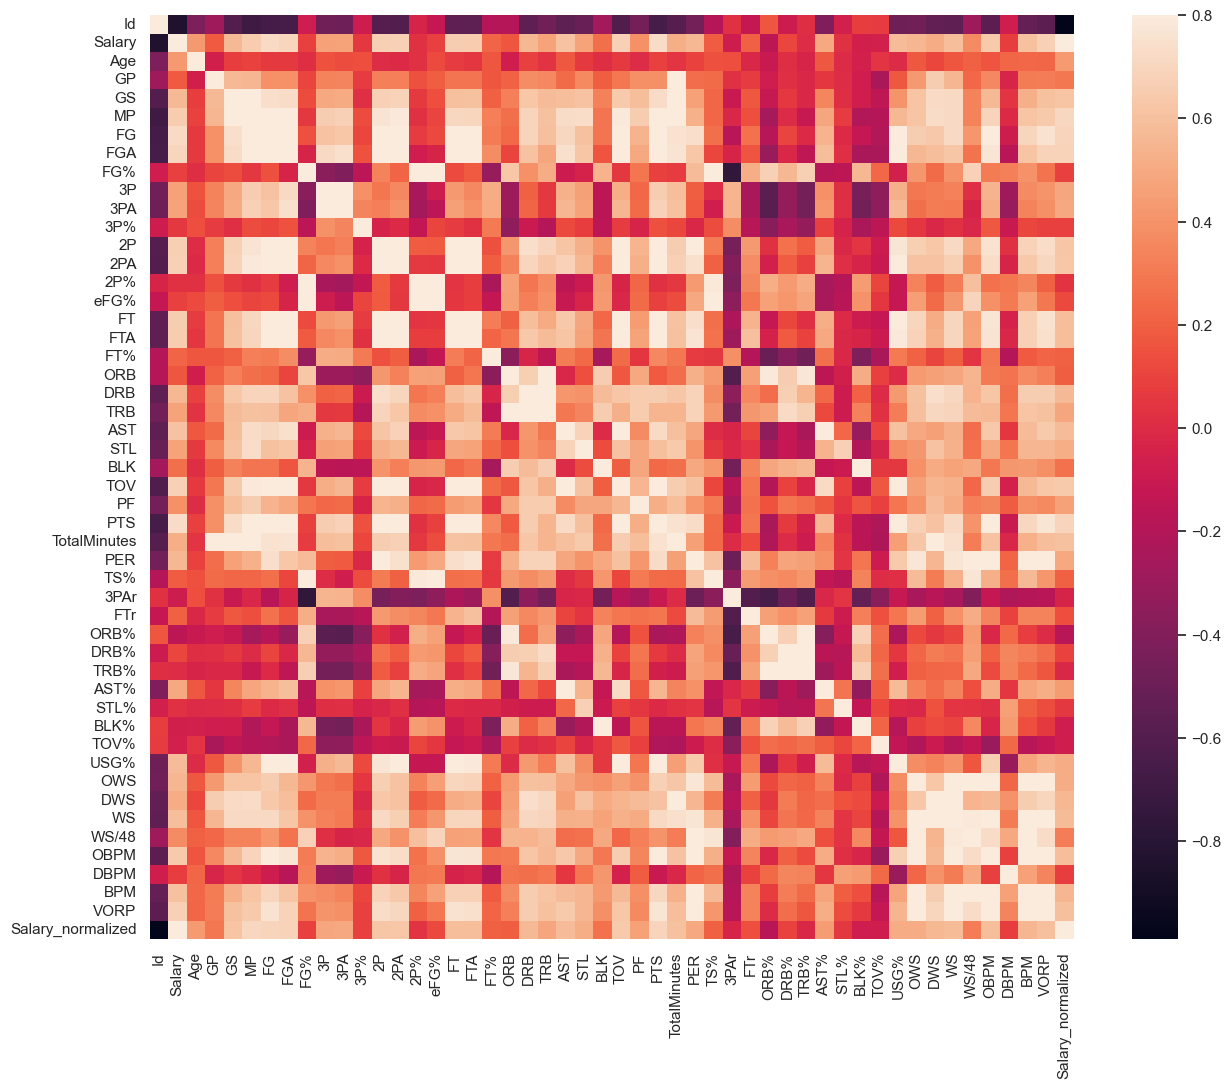

In [82]:
# Exclude non-numeric columns
numeric_df = nba_df.select_dtypes(include=[np.number])

corrmat = numeric_df.corr()

f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, vmax=0.8, square=True);

The code calculates the salary correlation (Salary_normalized) with other variables in corrmat data. It filters the correlation values ​​and prints the results in descending order. That is, the results of the code will show which variables have the strongest correlation with salary. (close to 1 or -1 indicate a strong correlation, and values ​​close to 0 indicate a weak correlation)

In [83]:
salary_correlations = corrmat['Salary_normalized']
print(salary_correlations.sort_values(ascending=False))

Salary_normalized    1.000000
Salary               0.889315
MP                   0.705716
FG                   0.691265
PTS                  0.689810
FGA                  0.682263
TOV                  0.643688
2PA                  0.627971
2P                   0.618999
GS                   0.617404
TotalMinutes         0.602006
VORP                 0.593305
OBPM                 0.587864
FT                   0.583878
FTA                  0.583573
AST                  0.579333
WS                   0.575457
DRB                  0.564469
DWS                  0.559693
BPM                  0.554775
STL                  0.520078
USG%                 0.512979
OWS                  0.509534
3PA                  0.492245
PER                  0.488896
TRB                  0.485257
3P                   0.483699
PF                   0.457441
AST%                 0.436578
Age                  0.429476
WS/48                0.313509
GP                   0.296261
BLK                  0.267544
FT%       

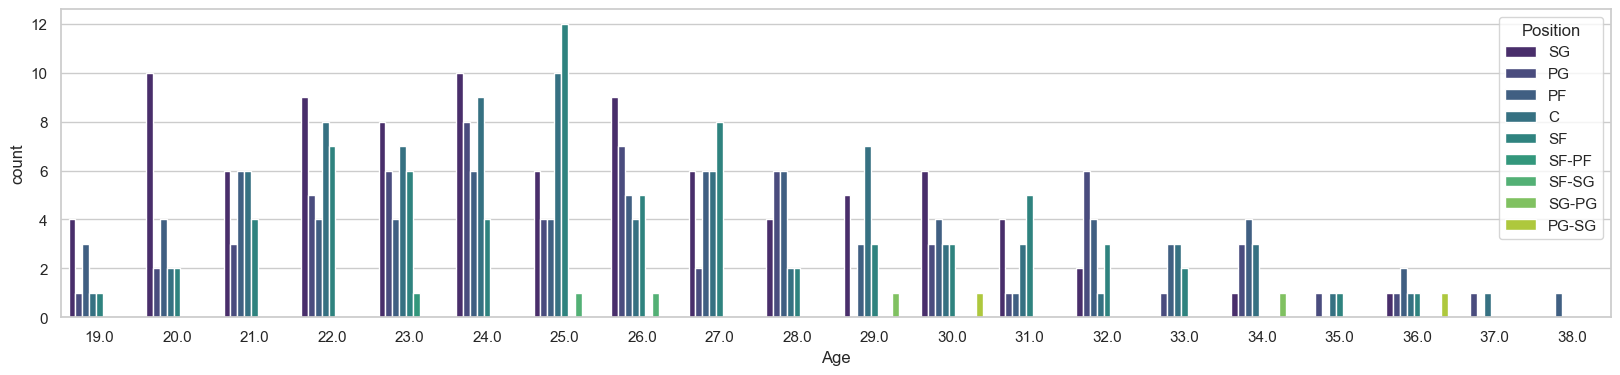

In [84]:
# Visualize number of players at each position by age

plt.figure(figsize=(20,4))
sns.set_style('whitegrid')
sns.countplot(x='Age',hue='Position', data=nba_df, palette='viridis');

#### Target Variable Visualizations

The graph provides insights into the distribution of salaries according to the players' positions, and allows you to see if there are positions where the salaries are significantly higher or lower

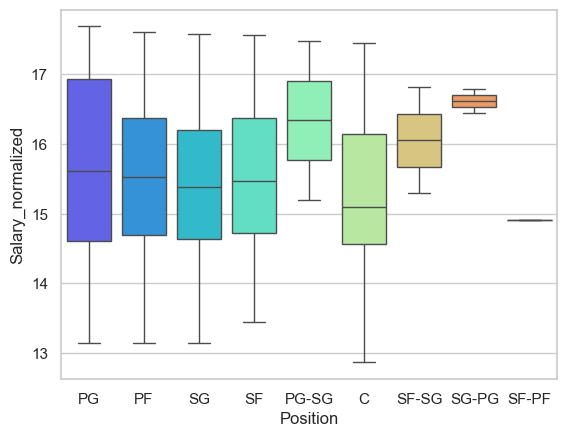

In [85]:
# boxplot to visualize the spread of salaries by each position
sns.boxplot(x='Position', y='Salary_normalized', data=nba_df, palette='rainbow');

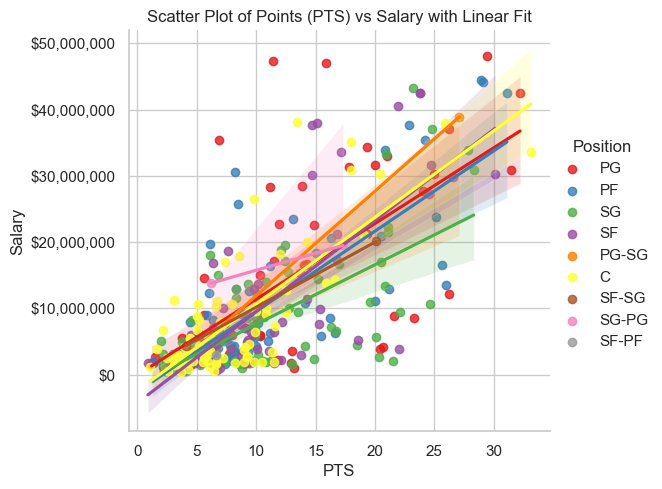

In [86]:
# plot to show correclation between points and salaries by position as well
# points has the highest positive correlation to salary as seen above
sns.lmplot(y='Salary', x='PTS', data=nba_df, hue='Position', palette='Set1')
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.title('Scatter Plot of Points (PTS) vs Salary with Linear Fit')
plt.show()

Now lets compare Salary to VORP.
VORP is a box score estimate of the points per 100 team possessions that a player contributes above a replacement level player, translated to an average team and proportional to an 82 game season.

The purpose of the graph:
A joint graph shows the relationship between two variables through a combination of a scatter plot and histograms of each of the variables.

Interpretation of the graph:
Scatter graph: In the center of the graph is a scatter graph that shows the relationship between the two variables. Each point represents a player.
Histograms: along the X-axis and the Y-axis there are histograms that show the distribution of data for each individual variable.
Possible targets:
Identification of relationships: it is possible to see if there is a clear relationship between VORP and the normalized salaries.
Identifying the dispersion of the data: The histograms show the dispersion of the data for each individual variable.
Identifying abnormal points: it is possible to identify if there are abnormal data that can affect the relationship between the variables.

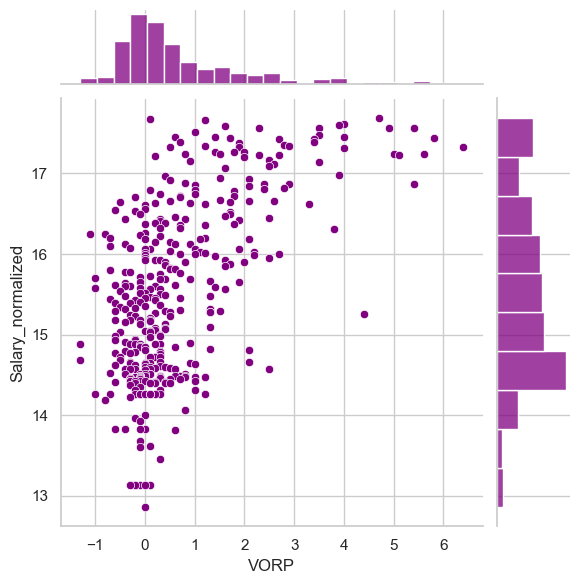

In [87]:
sns.jointplot(x='VORP',y='Salary_normalized',data=nba_df,color='purple');

Now lets compare Salary to a defensive advanced statistic like DWS.
DWS stands for Defensive Win Shares, which is a metric in the NBA that compares a player's defensive rating to the league average.

This scatterplot is designed to show the relationship between players' defensive contribution to the team (DWS) and their salaries, and to see if there are differences between the different positions. You can learn from the graph if there is a strong or weak relationship between the DWS and the salary, and if this relationship changes according to the players' positions.


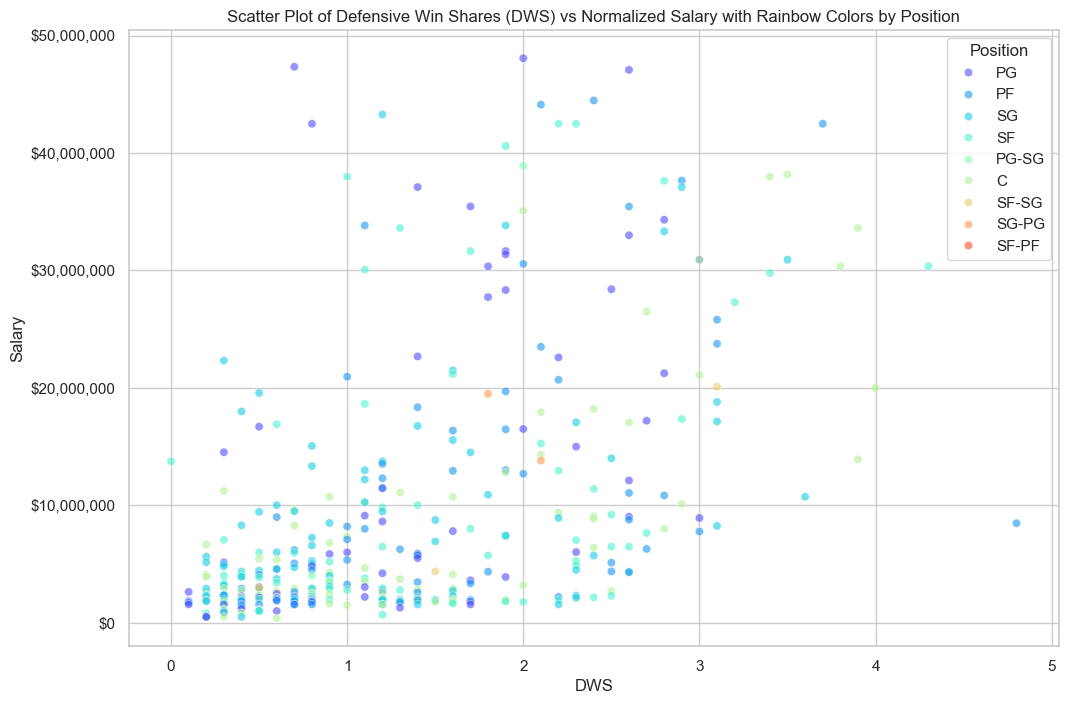

In [88]:

plt.figure(figsize=(12, 8))
sns.scatterplot(x='DWS', y='Salary', data=nba_df, hue='Position', palette='rainbow', alpha=0.6)

ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))

plt.title('Scatter Plot of Defensive Win Shares (DWS) vs Normalized Salary with Rainbow Colors by Position')

plt.show()

#### Feature Selection

#### Step 1: Dropping low correlated features
First, we are dropping features that have below a 0.2 correlation index with 'Salary'

The goal of the code is to create a list of numeric columns that can be used as explanatory variables (features) for the regression model, without including columns that do not contribute to the prediction or columns that contain the predicted variable (target variable).
Once the list of selected numeric columns is created, they can be used to train the regression model to predict the players' salaries

In [89]:
# Identify the columns to exclude from feature selection
exclude_columns = ['Id', 'Salary', 'Salary_normalized']

# Get the numerical columns excluding the columns to exclude
numeric_columns = [col for col in numeric_df.columns if col not in exclude_columns]

The purpose of the code is to improve the regression model by removing columns that do not contribute to the prediction of the 'Salary' variable. This can reduce the information noise and improve the performance of the model.
After removing the columns with the low correlation, you can train the regression model again and check its performance

In [90]:
# Identify columns with low correlation to 'Salary'
low_corr_columns = [col for col in numeric_columns if abs(corrmat.loc[col, 'Salary']) < 0.2]

# Print the list of low correlation columns
print(low_corr_columns)

# Drop low correlation columns from the numeric DataFrame
numeric_df.drop(columns=low_corr_columns, inplace=True)

# Drop low correlation columns from the NBA DataFrame
nba_df.drop(columns=low_corr_columns, inplace=True)

['GP', 'FG%', '3P%', '2P%', 'eFG%', 'ORB', 'TS%', '3PAr', 'ORB%', 'DRB%', 'TRB%', 'STL%', 'BLK%', 'TOV%', 'DBPM']


#### Step 2: Encoding Categorical Features
Next, we will encode categorical features so that our supervised model can use them for predicitons. These features are Position and Team. The position and team are likely influential on a player's salary but are represented by strings in our dataset. We will label encoding because the values of these features are within a limited range. This will give each team and position a unique numerical marker.

Converts category columns (in this case Position and Team) to numeric values ​​using LabelEncoder. This conversion is necessary when working with machine learning models, as these models cannot process textual columns directly.

In [91]:

from sklearn.preprocessing import LabelEncoder

# Create label encoders
position_encoder = LabelEncoder()
team_encoder = LabelEncoder()

# Perform label encoding for 'Position' and 'Team' variables
nba_df['Position_encoded'] = position_encoder.fit_transform(nba_df['Position'])
nba_df['Team_encoded'] = team_encoder.fit_transform(nba_df['Team'])

# Drop the original 'Position' and 'Team' columns
nba_df.drop(['Position', 'Team'], axis=1, inplace=True)
nba_df.head()


,Id,PlayerName,Salary,Age,GS,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,FT%,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,TotalMinutes,PER,FTr,AST%,USG%,OWS,DWS,WS,WS/48,OBPM,BPM,VORP,Salary_normalized,Position_encoded,Team_encoded
0,0.0,Stephen Curry,48070014.0,34.0,56.0,34.7,10.0,20.2,4.9,11.4,5.1,8.8,4.6,5.0,0.915,5.4,6.1,6.3,0.9,0.4,3.2,2.1,29.4,1941.0,24.1,0.248,30.0,31.0,5.8,2.0,7.8,0.192,7.5,7.5,4.7,17.688169,2,22
1,1.0,John Wall,47345760.0,32.0,3.0,22.2,4.1,9.9,1.0,3.2,3.1,6.7,2.3,3.3,0.681,2.3,2.7,5.2,0.8,0.4,2.4,1.7,11.4,755.0,13.6,0.334,35.3,27.0,-0.4,0.7,0.3,0.020,-0.8,-1.2,0.1,17.672988,2,29
2,2.0,Russell Westbrook,47080179.0,34.0,24.0,29.1,5.9,13.6,1.2,3.9,4.7,9.7,2.8,4.3,0.656,4.6,5.8,7.5,1.0,0.5,3.5,2.2,15.9,2126.0,16.1,0.317,38.6,27.7,-0.6,2.6,1.9,0.044,0.3,0.2,1.2,17.667363,2,34
3,3.0,LeBron James,44474988.0,38.0,54.0,35.5,11.1,22.2,2.2,6.9,8.9,15.3,4.6,5.9,0.768,7.1,8.3,6.8,0.9,0.6,3.2,1.6,28.9,1954.0,23.9,0.268,33.5,33.3,3.2,2.4,5.6,0.138,5.5,6.1,4.0,17.610438,1,32
4,4.0,Kevin Durant,44119845.0,34.0,47.0,35.6,10.3,18.3,2.0,4.9,8.3,13.4,6.5,7.1,0.919,6.3,6.7,5.0,0.7,1.4,3.3,2.1,29.1,1672.0,25.9,0.387,24.5,30.7,4.7,2.1,6.8,0.194,6.0,7.1,3.9,17.602420,1,6


Designed to identify the skewness in the numerical data in the DataFrame. Skewness is a measure that shows the asymmetry of the distribution of values ​​in a particular column. Positive values ​​of the skew indicate that the distribution is skewed to the right (there are more small values), while negative values ​​indicate that the distribution is skewed to the left (there are more large values).

In [92]:
# Identify skewness in numerical features
skewed_feats = (numeric_df.apply(lambda x: skew(x.dropna())).sort_values(ascending=False))

# Print a header for the skewness results
print("\nSkew in numerical features: \n")

# Create a DataFrame to display the skewness values
skewness = pd.DataFrame({"Skew": skewed_feats})

# Display the top 20 skewed features
skewness.head(20)


Skew in numerical features: 



,Skew
BLK,2.220945
FT,2.082965
FTA,2.023634
VORP,1.788223
Salary,1.621728
AST,1.488839
OWS,1.450663
2P,1.312279
TRB,1.262540
2PA,1.252502


The purpose of the code is to identify numeric columns that have a particularly high skew. High skewness may indicate that the distribution of the column values ​​is not normal, which may affect the performance of your learning model. Usually, it is necessary to correct for such bias before building a model by applying some transformation (eg, log, sqrt, or Box-Cox)

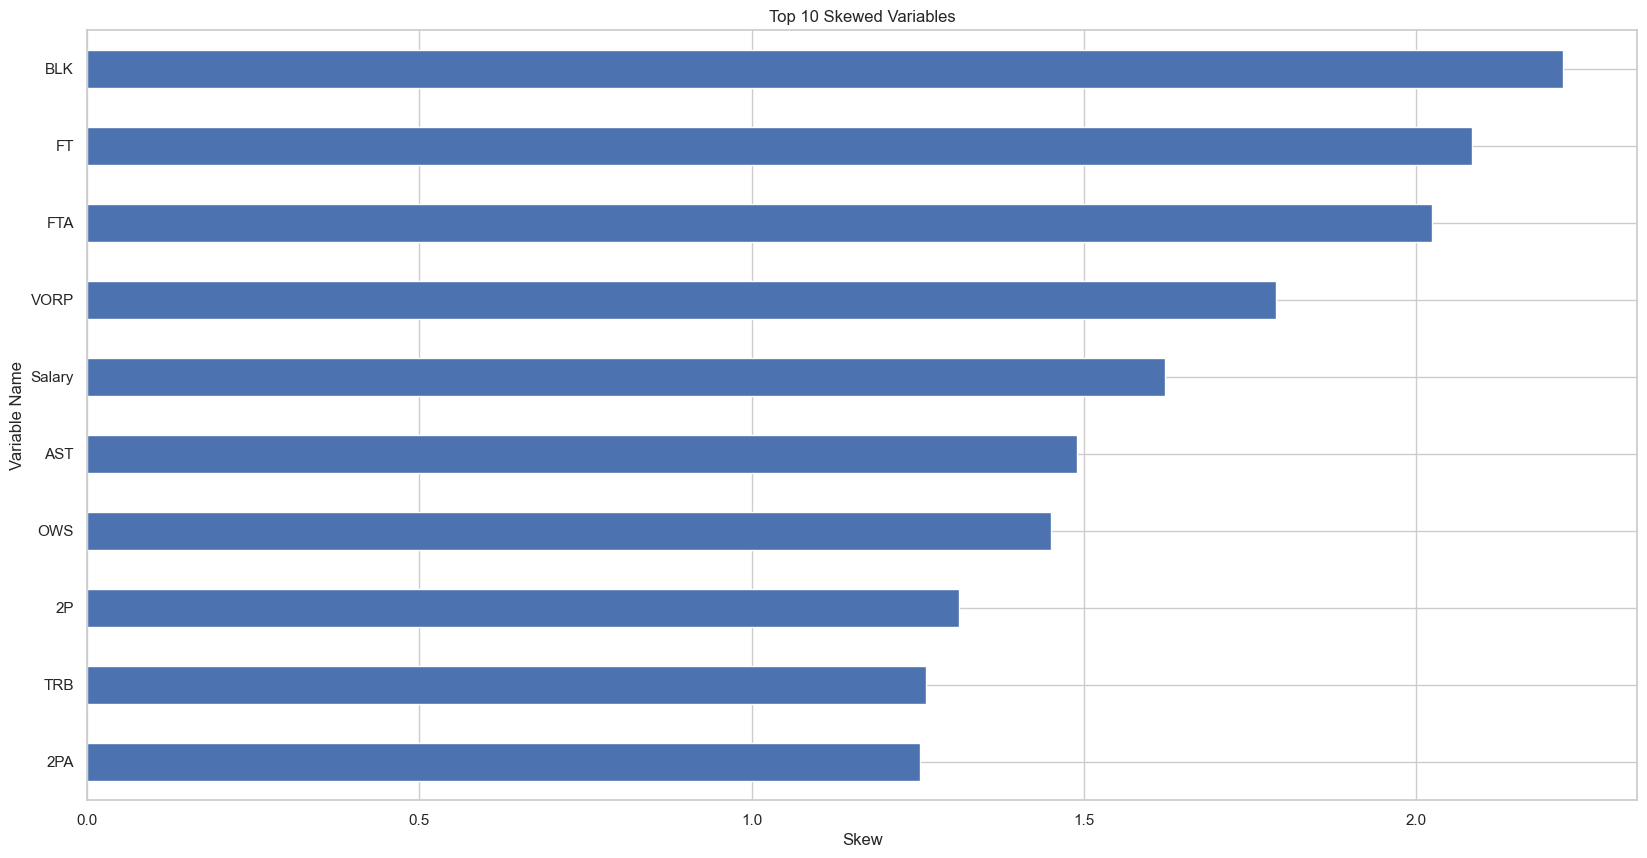

In [93]:
skewness["Skew"].head(10).plot(
    kind="barh", figsize=(20, 10)
).invert_yaxis()  # top 10 skewed columns
plt.xlabel("Skew")
plt.ylabel("Variable Name")
plt.title("Top 10 Skewed Variables")
plt.show()

designed to filter out the columns with the most significant skew in your data, and then check how many such columns exist, so that they can be further subjected to a Box-Cox transformation to help normalize their distribution

In [94]:
# Filter skewness DataFrame to keep only features with an absolute skewness greater than 0.75
skewness = skewness[abs(skewness) > 0.75]

# Print the number of skewed numerical features that will undergo Box-Cox transformation for normalization
print("There are {} skewed numerical features to Box Cox transform (normalize)".format(skewness.shape[0]))

There are 35 skewed numerical features to Box Cox transform (normalize)


 designed to identify columns in the numeric_df database where there are negative values, and print those column names.

Why is it important to check negative values?
Normalization and Distribution: Negative values ​​may require special handling, especially if you plan to apply transformations like Box-Cox, which does not handle negative values ​​well.
Understanding the data: In some cases, negative values ​​in certain columns may indicate an error in the data or values ​​that are inconsistent with the business or scientific understanding of the problem.
Certain models: Some machine learning models do not deal well with negative values, especially when it comes to variables that should be positive such as prices or salaries.

In [95]:
negative_value_columns = numeric_df.columns[(numeric_df < 0).any()]

# Print the list of column names
print("Columns with negative values:")
print(negative_value_columns.tolist())


Columns with negative values:
['OWS', 'WS', 'WS/48', 'OBPM', 'BPM', 'VORP']


The purpose of the code is to selectively apply the Box-Cox transformation only to the columns that require it, thus normalizing their distribution and reducing the bias, which will improve the quality of the model later on

In [96]:
# Get the names of skewed features from the skewness DataFrame
skewed_features = skewness.index

# Set the lambda parameter for Box-Cox transformation
lam = 0.15

# Loop through each skewed feature
for feat in skewed_features:
    
    # Check if the feature is not in the exclusion list
    if feat not in [
        "Id",
        "Salary",
        "Salary_normalized",
        "Salary17-18",
        "Salary18-19",
        "Salary19-20",
        "Salary20-21",
        "Salary21-22",
        'OWS', 
        'WS', 
        'WS/48', 
        'OBPM', 
        'DBPM', 
        'BPM', 
        'VORP'
    ]:
        # Apply the Box-Cox transformation with the specified lambda to the feature in the DataFrame
        nba_df[feat] = boxcox1p(nba_df[feat], lam)


The code helps you identify problems with missing values ​​in the data so you can address them later (for example, using imputation, removing rows or columns, or using default values). Understanding the amount of missing values ​​in each column can help make decisions about the best way to handle this data in order to improve the quality of the analysis or model.

In [97]:
# Identify columns in the DataFrame that contain any null values
null_columns = nba_df.columns[nba_df.isnull().any()]

# Count the number of null values in each of the identified columns
null_count = nba_df[null_columns].isnull().sum()

# Print the header for the null count results
print("Column Name: NULL Count")

# Loop through each null column and print its name along with the count of null values
for i in range(0, len(null_columns)):
    print(f"{null_columns[i]}: {null_count[i]}")

Column Name: NULL Count


## Data Analytics

All of our data is labled therefore we will be implementing supervised learning methods

In [98]:
!pip install xgboost
!pip install scikit-optimize

'pip' is not recognized as an internal or external command,
operable program or batch file.
'pip' is not recognized as an internal or external command,
operable program or batch file.


In [99]:
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from skopt import BayesSearchCV

Here we define multiple regression features that will train and evaluate.

In [100]:
# Initialize a Linear Regression model with intercept
lr_w_int = LinearRegression()

# Initialize a Linear Regression model without intercept
lr_no_int = LinearRegression(fit_intercept=False)

# Initialize an Elastic Net regression model with specified alpha and l1_ratio
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.1)

# Initialize a Random Forest regressor with 500 estimators (trees)
rf = RandomForestRegressor(n_estimators=500)

# Initialize a Decision Tree regressor with a maximum depth of 10
dt = DecisionTreeRegressor(max_depth=10)

# Initialize an XGBoost regressor with specified parameters for depth, estimators, and learning rate
model_xgb = xgb.XGBRegressor(max_depth=5, n_estimators=1000, learning_rate=0.01)

# Initialize another XGBoost regressor with the same parameters (possibly for hyperparameter tuning)
model_xgb_hyper = xgb.XGBRegressor(max_depth=5, n_estimators=1000, learning_rate=0.01)


This function, `hyperparameter_tune_bayesian`, performs Bayesian hyperparameter tuning for an XGBoost regressor using training features (`X_train`) and target variable (`y_train`). It defines a parameter search space, applies Bayesian optimization with cross-validation, and returns the best hyperparameters found.

Why is this important?
Hyperparametric tuning is important to improve model performance and ensure that the model does not overfit the training data and fails to generalize to new data. The use of Bayesian search makes it possible to find the optimal parameters more efficiently than traditional search methods such as Grid Search.

X_train: the training data, features.
y_train: the target data, the salary values ​​in this case.
regressor: the type of regressor to use, in this case it is XGBoost.
The field of parameters:

The parameter space is defined in the param_space_common dictionary. Here we set possible ranges of various parameters for XGBoost:
n_estimators: the number of trees in the forest (between 100 and 1200).
learning_rate: the learning rate (between 0.01 and 0.2, with a logarithmic scale).
max_depth: maximum depth of each tree (between 3 and 10).
Selection of the regressor:

The code checks if the regressor is XGBoost (using regressor_type == "xgboost"). If so, it uses a regressor of type xgb.XGBRegressor(). If not, it will throw an error stating that the regressor is not supported.
Bayesian Search:

BayesSearchCV is an advanced technique that performs a more efficient parameter search than a regular grid search. Instead of testing all possibilities, it tries to predict the best hyperparameters based on previous results.
The parameters the function tries to adjust are those defined in param_space.
The goal is to minimize the mean squared error (Mean Squared Error) throughout 5 cross-validations (cv=5).
Fitting the model (Fit):

bayes_search.fit(X_train, np.log1p(y_train)): This function fits the search to the training data, where y_train is taken in natural logarithm to smooth the data distribution.
Returning the best parameters:

best_params: The optimal parameters found during the search are returned


In [101]:
def hyperparameter_tune_bayesian(X_train, y_train, regressor):
    """
    Perform hyperparameter tuning for XGBoost using Bayesian search.

    Parameters:
    - X_train: pandas DataFrame
        Training features.
    - y_train: pandas Series
        Training target variable.
    - regressor_type: str
        Type of regressor to tune ('xgboost').

    Returns:
    - best_params: dict
        Best hyperparameters found during tuning.
    """
    # Define the common parameter space for both XGBoost
    param_space_common = {
        "n_estimators": (100, 1200),
        "learning_rate": (0.01, 0.2, "log-uniform"),
        "max_depth": (3, 10),
    }

    regressor_type = regressor.lower()
    if regressor_type == "xgboost":
        regressor = xgb.XGBRegressor()
    else:
        raise ValueError("Unsupported regressor type. Choose 'xgboost'.")

    # Update the search space with common parameters
    param_space = param_space_common.copy()

    # Perform Bayesian search
    bayes_search = BayesSearchCV(
        estimator=regressor,
        search_spaces=param_space,
        scoring="neg_mean_squared_error",
        cv=5,
        n_jobs=-1,  # Set the number of parallel jobs
    )
    bayes_search.fit(X_train, np.log1p(y_train))

    # Get the best hyperparameters
    best_params = bayes_search.best_params_

    return best_params

This function, `k_fold_regression`, performs k-fold cross-validation on a given dataset using a specified regressor to predict a target column (default "Salary"). It splits the data into training and validation sets, fits the model, and evaluates its performance using RMSE for each fold. Optionally, it can tune hyperparameters for an XGBoost regressor. The function returns a DataFrame with prediction results for each fold, along with lists of RMSE scores, training set sizes, and validation set sizes.

In [102]:
def k_fold_regression(
    data,
    regressor,
    target_column="Salary",
    cols_to_ignore=['Salary', 'Id', 'PlayerName', 'Salary_normalized'],
    n_splits=5,
    tune_hyperparameters=False,
    model_name=None
):
    rmse_scores = []
    train_sizes = []
    test_sizes = []
    fold_results = []

    # Prepare the feature matrix X and target vector y
    X = data.drop(columns=cols_to_ignore)
    y = data[target_column]

    # Initialize KFold cross-validator
    kf = KFold(n_splits=n_splits, shuffle=True)

    # Cross-validation process
    foldCount = 0
    fold_models = []
    for train_index, val_index in kf.split(X):
        if (
            isinstance(regressor, (xgb.XGBRegressor))
            and tune_hyperparameters
        ):
            if isinstance(regressor, xgb.XGBRegressor):
                regressor_type = "xgboost"
            else:
                raise ValueError(
                    "Unsupported regressor type. Supported types: XGBRegressor"
                )

            # Use the entire training data for hyperparameter tuning
            best_params = hyperparameter_tune_bayesian(X, y, regressor_type)
            print(f"Best hyperparameters for {regressor_type} Fold: {best_params}")
            regressor.set_params(**best_params)

        # Split into training and validation folds
        X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
        y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

        # Fit the model on the training fold
        regressor.fit(X_train_fold, np.log1p(y_train_fold))  # Fit on log-transformed target
        fold_models.append(regressor)
        y_pred_log_fold = regressor.predict(X_val_fold)
        y_pred_fold = np.expm1(y_pred_log_fold)  # Convert back to original scale

        # Calculate RMSE for the validation fold
        rmse = np.sqrt(mean_squared_error(y_val_fold, y_pred_fold))

        if (
            isinstance(regressor, (xgb.XGBRegressor))
            and tune_hyperparameters
        ):
            print(model_name, f"RMSE: {rmse:.4f}, Train Size: {len(y_train_fold)}, Test Size: {len(y_val_fold)}")

        # if regular xgboost, then print rmse for best folds since this is a high performing model
        elif isinstance(regressor, RandomForestRegressor):
            print(f"Random Forest: {rmse:.4f}, Train Size: {len(y_train_fold)}, Test Size: {len(y_val_fold)}")

        rmse_scores.append(rmse)
        train_sizes.append(len(y_train_fold))
        test_sizes.append(len(y_val_fold))

        # Record results for 'Id', 'Actual', 'Predicted', 'Fold', and 'Set' in a list
        fold_results.append({
            'Id' : foldCount,
            'Actual': y_val_fold.tolist(),
            'Predicted': y_pred_fold,
            'rmse' : rmse
        })
        foldCount += 1

        
    # Create a DataFrame from the results
    result_df = pd.DataFrame(
        fold_results, columns=["Id", "Actual", "Predicted", 'rmse']
    )

    return result_df, rmse_scores, train_sizes, test_sizes, fold_models

This function, `compute_rmse_std_k_fold`, calculates the mean and standard deviation of RMSE scores from k-fold cross-validation on a given DataFrame using a specified model. It optionally tunes hyperparameters for the model and appends the RMSE scores from each fold to a list. The function returns the mean and standard deviation of the RMSE scores.

The k_fold_regression function performs training and validation of a regression model on data using the K-Fold Cross-Validation method. It fits different models to the data, measures their performance, and returns the results in an orderly manner.

Main goals and actions of the function:
The distribution of the data into training and testing groups:

The data is divided into n_splits groups (Folds). Each time one group is used for validation and the rest for training.
Training the model:

Each time the model is trained on the training set and its performance is checked on the test set.
Hyperparameters (optional):

If tune_hyperparameters=True, hyperparameters are tuned for the XGBoost model using Bayesian search.
Performance calculation:

Calculating RMSE (Root Mean Squared Error) for each fold to measure model performance.
The RMSE is calculated on the log-corrected values, and the predicted values ​​are rescaled to the original scale.
Returning results:

When finished, the function returns a DataFrame with the results of each fold, including the RMSE, the size of the training and test set, and a list of the models trained in each fold.
Highlights in the code:
Cross-Validation: The Cross-Validation method enables a more stable evaluation of the model by using several different distributions of the data.
Regularization: If you use models that perform regularization (like XGBoost), they can prevent overfitting.
Transformation: The data is logarithmically transformed before training to deal with wide dispersion (Skewness) in salaries.
Using the function:
The function is especially suitable for use when you want to evaluate the performance of the model on data that has not been seen before and use advanced techniques to improve the accuracy of the predictions.

In [103]:
def compute_rmse_std_k_fold(df, model, tune_hyper=False, model_name=None):
    # Initialize a list to store RMSE values from k-fold cross-validation
    rmse_list = []
    
    # Append the RMSE result from k-fold regression for the given model to the list
    rmse_list.append(k_fold_regression(df, model, tune_hyperparameters=tune_hyper, model_name=model_name)[1])

    # Calculate the mean of the RMSE values
    mean = np.mean(rmse_list)
    # Calculate the standard deviation of the RMSE values
    std = np.std(rmse_list)

    # Return the mean and standard deviation of the RMSE
    return mean, std

Now we are training each of the models and saving their RMSE and STD.

1. Running different models and testing performance:
The code runs the compute_rmse_std_k_fold function for each of the predefined terms:
lr_no_int (linear regression without intercept).
lr_w_int (linear regression with intercept).
elastic_net (Elastic Net).
dt (decision tree).
rf (Random Forest).
model_xgb (XGBoost).
model_xgb_hyper (XGBoost with hyperparameter tuning).
2. Calculation of average and standard deviation (RMSE and STD):
For each of the above models, the compute_rmse_std_k_fold function returns a list containing the RMSE and STD (standard deviation) from the experiments.
The process of calculating the average RMSE and STD is performed over 30 repeated tests, with each model undergoing a K-Fold Cross-Validation process.
3. Preparing the data for imaging:
Create a DataFrame (data_df) that contains the information about each model, including the RMSE and STD for each of them.
The data is sorted by the value of the RMSE in ascending order, so that it will be possible to identify which model is the most accurate.
4. Use of additional parameters:
The line of code that runs the model_xgb_hyper with hyperparameter tuning can take a long time (about 10 minutes), so there is an option to treat this code as authority only (by commenting out or removing these lines to run faster).
5. Final result:
The data obtained from the function describes the performance of the various models in terms of mean error (RMSE) and standard deviation. This way you can compare the models and choose the optimal model for the given problem.
The final output is a table containing the name of the algorithm, the average RMSE and the STD for each of the models tested.

In [104]:
#Get the avg rmse and std over 30 tests for each model
lr_no_int_list = compute_rmse_std_k_fold(nba_df, lr_no_int)
lr_w_int_list = compute_rmse_std_k_fold(nba_df, lr_w_int)
elastic_net_list = compute_rmse_std_k_fold(nba_df, elastic_net)
dt_list = compute_rmse_std_k_fold(nba_df, dt)
rf_list = compute_rmse_std_k_fold(nba_df, rf)
model_xgb_list = compute_rmse_std_k_fold(nba_df, model_xgb)

#The next line takes a while (Roughly 10 mins), If want to quickly run, comment out this line and the line below in data
model_xgb_hyper_list = compute_rmse_std_k_fold(nba_df, model_xgb, tune_hyper=True)

# plot RMSE and STD for each Algorithm
data = {
    "Linear (No Intercept)": lr_no_int_list,
    "Linear (w/ Intercept)": lr_w_int_list,
    "Elastic Net": elastic_net_list,
    "Decision Tree": dt_list,
    "Random Forest": rf_list,
    "XGBoost": model_xgb_list,

    #Comment below if want to run quicker
    "XGBoost Hyper": model_xgb_hyper_list,
}
data_df = pd.DataFrame(data=data).T.reset_index().sort_values(by=[0], ascending=True)
data_df.columns = ["Algorithm", "RMSE", "STD"]

Random Forest: 5697411.5953, Train Size: 300, Test Size: 76
Random Forest: 6497575.1393, Train Size: 301, Test Size: 75
Random Forest: 5880631.6435, Train Size: 301, Test Size: 75
Random Forest: 7280068.2959, Train Size: 301, Test Size: 75
Random Forest: 5644941.9902, Train Size: 301, Test Size: 75
Best hyperparameters for xgboost Fold: OrderedDict({'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 584})
None RMSE: 6670618.9214, Train Size: 300, Test Size: 76
Best hyperparameters for xgboost Fold: OrderedDict({'learning_rate': 0.09539071724728194, 'max_depth': 3, 'n_estimators': 893})
None RMSE: 4667391.9549, Train Size: 301, Test Size: 75
Best hyperparameters for xgboost Fold: OrderedDict({'learning_rate': 0.07948209457471676, 'max_depth': 3, 'n_estimators': 392})
None RMSE: 7046232.8901, Train Size: 301, Test Size: 75
Best hyperparameters for xgboost Fold: OrderedDict({'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 452})
None RMSE: 5134113.1929, Train Size: 301, Test Siz

In [105]:

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [106]:
# Define the models
lr_w_int = LinearRegression()
lr_no_int = LinearRegression(fit_intercept=False)
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.1)
rf = RandomForestRegressor(n_estimators=500)
dt = DecisionTreeRegressor(max_depth=10)
model_xgb = xgb.XGBRegressor(max_depth=5, n_estimators=1000, learning_rate=0.01)
model_xgb_hyper = xgb.XGBRegressor(max_depth=5, n_estimators=1000, learning_rate=0.01)


In [107]:
# Compute RMSE and STD for each model
lr_no_int_list = compute_rmse_std_k_fold(nba_df, lr_no_int)
lr_w_int_list = compute_rmse_std_k_fold(nba_df, lr_w_int)
elastic_net_list = compute_rmse_std_k_fold(nba_df, elastic_net)
dt_list = compute_rmse_std_k_fold(nba_df, dt)
rf_list = compute_rmse_std_k_fold(nba_df, rf)
model_xgb_list = compute_rmse_std_k_fold(nba_df, model_xgb)
model_xgb_hyper_list = compute_rmse_std_k_fold(nba_df, model_xgb_hyper, tune_hyper=True)


Random Forest: 6687239.5181, Train Size: 300, Test Size: 76
Random Forest: 6161614.4579, Train Size: 301, Test Size: 75
Random Forest: 4714661.1979, Train Size: 301, Test Size: 75
Random Forest: 6269000.1983, Train Size: 301, Test Size: 75
Random Forest: 6460382.6634, Train Size: 301, Test Size: 75
Best hyperparameters for xgboost Fold: OrderedDict({'learning_rate': 0.049812737640352635, 'max_depth': 3, 'n_estimators': 678})
None RMSE: 6221371.6074, Train Size: 300, Test Size: 76
Best hyperparameters for xgboost Fold: OrderedDict({'learning_rate': 0.08571511736082489, 'max_depth': 3, 'n_estimators': 1200})
None RMSE: 6314045.5046, Train Size: 301, Test Size: 75
Best hyperparameters for xgboost Fold: OrderedDict({'learning_rate': 0.08604129117324832, 'max_depth': 3, 'n_estimators': 438})
None RMSE: 4139384.3554, Train Size: 301, Test Size: 75
Best hyperparameters for xgboost Fold: OrderedDict({'learning_rate': 0.17269156138319244, 'max_depth': 3, 'n_estimators': 735})
None RMSE: 5844812

In [108]:
data = {
    "Linear (No Intercept)": lr_no_int_list,
    "Linear (w/ Intercept)": lr_w_int_list,
    "Elastic Net": elastic_net_list,
    "Decision Tree": dt_list,
    "Random Forest": rf_list,
    "XGBoost": model_xgb_list,
    "XGBoost Hyper": model_xgb_hyper_list,
}
data_df = pd.DataFrame(data=data).T.reset_index().sort_values(by=[0], ascending=True)
data_df.columns = ["Algorithm", "RMSE", "STD"]


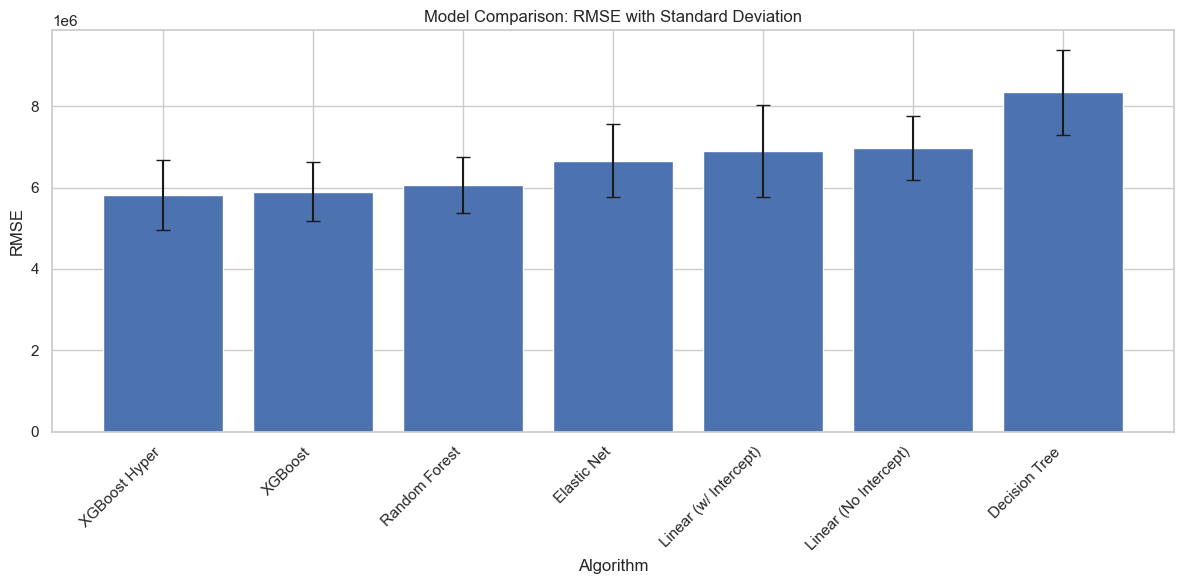

In [109]:
# Visualize the results
plt.figure(figsize=(12, 6))
plt.bar(data_df['Algorithm'], data_df['RMSE'], yerr=data_df['STD'], capsize=5)
plt.title('Model Comparison: RMSE with Standard Deviation')
plt.xlabel('Algorithm')
plt.ylabel('RMSE')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [110]:
# Print the results
print(data_df)

# Select the best performing model (assuming it's XGBoost with hyperparameter tuning)
best_model = model_xgb_hyper

# Perform a final k-fold cross-validation on the best model
result_df, rmse_scores, train_sizes, test_sizes, fold_models = k_fold_regression(
    nba_df, best_model, tune_hyperparameters=True, model_name="XGBoost (Tuned)"
)

# Print the final model's performance
print(f"Final Model (XGBoost Tuned) - Mean RMSE: {np.mean(rmse_scores):.4f} (±{np.std(rmse_scores):.4f})")


               Algorithm          RMSE           STD
6          XGBoost Hyper  5.813426e+06  8.671022e+05
5                XGBoost  5.901868e+06  7.355988e+05
4          Random Forest  6.058580e+06  6.953659e+05
2            Elastic Net  6.658513e+06  8.953552e+05
1  Linear (w/ Intercept)  6.895580e+06  1.136717e+06
0  Linear (No Intercept)  6.979233e+06  7.888956e+05
3          Decision Tree  8.340962e+06  1.050638e+06
Best hyperparameters for xgboost Fold: OrderedDict({'learning_rate': 0.010024037444535287, 'max_depth': 3, 'n_estimators': 817})
XGBoost (Tuned) RMSE: 6288634.0263, Train Size: 300, Test Size: 76
Best hyperparameters for xgboost Fold: OrderedDict({'learning_rate': 0.053862255308697815, 'max_depth': 3, 'n_estimators': 1200})
XGBoost (Tuned) RMSE: 5023476.3408, Train Size: 301, Test Size: 75
Best hyperparameters for xgboost Fold: OrderedDict({'learning_rate': 0.02842559267828493, 'max_depth': 3, 'n_estimators': 153})
XGBoost (Tuned) RMSE: 4775116.1441, Train Size: 301, Te

In [117]:
nba_df.columns

Index(['Id', 'PlayerName', 'Salary', 'Age', 'GS', 'MP', 'FG', 'FGA', '3P',
       '3PA', '2P', '2PA', 'FT', 'FTA', 'FT%', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'TotalMinutes', 'PER', 'FTr', 'AST%', 'USG%',
       'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'BPM', 'VORP', 'Salary_normalized',
       'Position_encoded', 'Team_encoded', 'PredictedSalary'],
      dtype='object')

In [111]:
# Train the final model on the entire dataset
X = nba_df.drop(columns=['Salary', 'Id', 'PlayerName', 'Salary_normalized'])
y = nba_df['Salary']

final_model = xgb.XGBRegressor(**best_model.get_params())
final_model.fit(X, np.log1p(y))

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': final_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))


Top 10 Most Important Features:
   feature  importance
2       MP    0.209550
17     TOV    0.129956
8      2PA    0.114535
0      Age    0.099434
19     PTS    0.056077
6      3PA    0.046796
31    VORP    0.022930
3       FG    0.022133
28   WS/48    0.019052
1       GS    0.018816


<Figure size 1000x600 with 0 Axes>

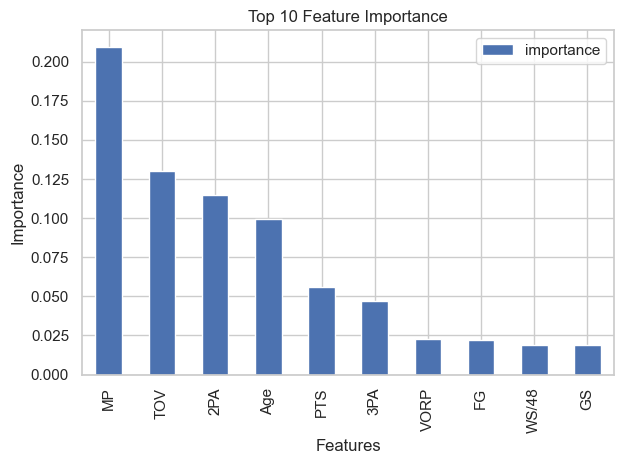

In [112]:
# Plotting feature importance
plt.figure(figsize=(10, 6))
feature_importance.head(10).plot(x='feature', y='importance', kind='bar')
plt.title('Top 10 Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

# Function to make predictions
def predict_salary(player_stats):
    player_stats_df = pd.DataFrame([player_stats])
    log_pred = final_model.predict(player_stats_df)
    return np.expm1(log_pred)[0]

In [113]:
# Instead of using an example player, let's use the first player from nba_test
test_player = nba_df.iloc[0]

# Extract features for prediction (excluding target and non-feature columns)
player_features = test_player.drop(['Salary', 'Id', 'PlayerName', 'Salary_normalized']).to_dict()

# Make prediction
predicted_salary = predict_salary(player_features)
def predict_salary(player_stats):
    player_stats_df = pd.DataFrame([player_stats])
    player_stats_df = player_stats_df[final_model.feature_names_in_]  # Align with the trained model's features
    log_pred = final_model.predict(player_stats_df)
    return np.expm1(log_pred)[0]

# Get actual salary
actual_salary = test_player['Salary']

# Print results
print("\nPrediction for a player from the test set:")
print(f"Player Name: {test_player['PlayerName']}")
print(f"Actual Salary: ${actual_salary:,.2f}")
print(f"Predicted Salary: ${predicted_salary:,.2f}")
print(f"Prediction Error: ${abs(actual_salary - predicted_salary):,.2f}")
print(f"Percentage Error: {abs(actual_salary - predicted_salary) / actual_salary * 100:.2f}%")

# Print some key stats of this player
print("\nKey Stats:")
for feature, value in player_features.items():
    if feature in ['Age', 'G', 'GS', 'MP', 'PTS', 'TRB', 'AST']:
        print(f"{feature}: {value}")


predicted_salary = predict_salary(player_features)
print(f"\nPredicted salary for example player: ${predicted_salary:,.2f}")


Prediction for a player from the test set:
Player Name: Stephen Curry
Actual Salary: $48,070,014.00
Predicted Salary: $47,718,240.00
Prediction Error: $351,774.00
Percentage Error: 0.73%

Key Stats:
Age: 4.697012078927853
GS: 5.559490358416789
MP: 4.73081686507766
TRB: 2.2786865383928596
AST: 2.3160390089201686
PTS: 4.459351852515735

Predicted salary for example player: $47,718,240.00


Explanation:
Predict Function:

predict_salary() function predicts the salary for a player by aligning the features in player_stats with those expected by the trained model.
Apply to DataFrame:

The apply() function is used to iterate over each row in nba_df. For each row, it extracts the relevant features, passes them to the predict_salary() function, and stores the prediction in the new column PredictedSalary.
Display the Results:

Finally, result_df is created, which includes the player's name, actual salary, and predicted salary.

In [114]:
# Apply the prediction function to each row in the DataFrame
nba_df['PredictedSalary'] = nba_df.apply(
    lambda row: predict_salary(row.drop(['Salary', 'Id', 'PlayerName', 'Salary_normalized']).to_dict()), axis=1)

# Format the PredictedSalary column to show numbers with commas like the Salary column
nba_df['PredictedSalary'] = nba_df['PredictedSalary'].apply(lambda x: f"${x:,.2f}")

# Format the original Salary column to show numbers with commas and two decimal places
nba_df['Salary'] = nba_df['Salary'].apply(lambda x: f"${x:,.2f}")

# Select relevant columns to display
result_df = nba_df[['PlayerName', 'Salary', 'PredictedSalary']]

# Print the DataFrame with the player's name, salary, and predicted salary
print(result_df)

            PlayerName          Salary PredictedSalary
0        Stephen Curry  $48,070,014.00  $47,718,240.00
1            John Wall  $47,345,760.00  $48,016,240.00
2    Russell Westbrook  $47,080,179.00  $47,103,244.00
3         LeBron James  $44,474,988.00  $44,715,784.00
4         Kevin Durant  $44,119,845.00  $44,659,528.00
..                 ...             ...             ...
418         Luka Garza     $508,891.00     $512,006.38
419       Kevon Harris     $508,891.00     $511,336.41
422    Dominick Barlow     $508,891.00     $514,091.69
424        Jeff Dowtin     $508,891.00     $516,155.00
430   Orlando Robinson     $386,055.00     $398,838.22

[376 rows x 3 columns]


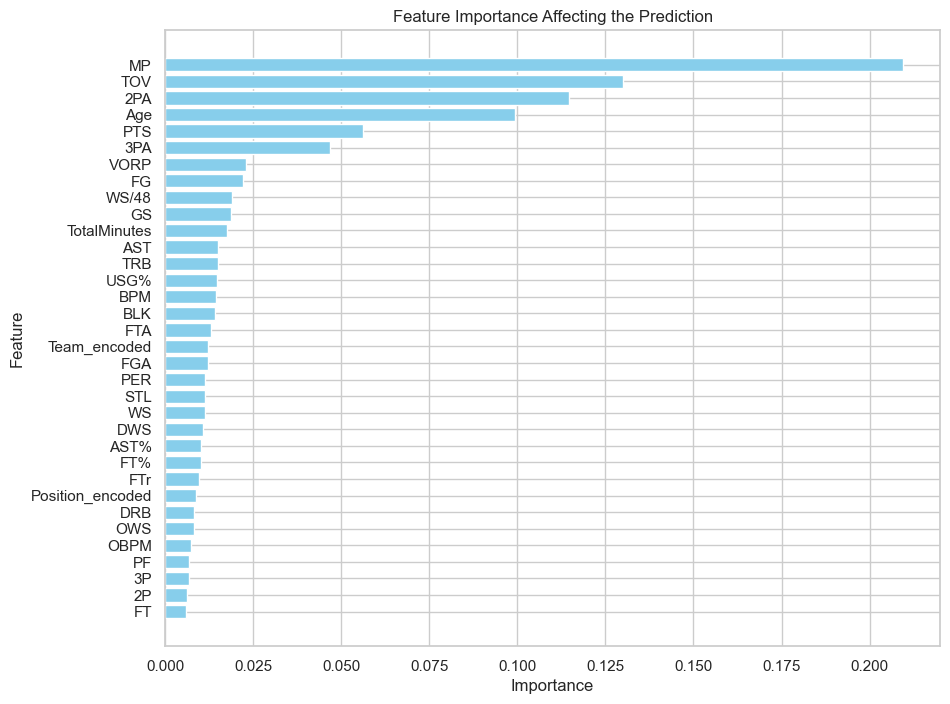

In [115]:
import matplotlib.pyplot as plt

# Assuming you're using the final model (e.g., XGBoost) to get feature importance
# Feature importance from the XGBoost model
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': final_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Affecting the Prediction')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()
